# Model evaluation

## Import packages

In [7]:
## import modules
import pickle
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.utils import np_utils
from Evaluation import * 
from Images import * 
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, accuracy_score, roc_auc_score
from Images import * 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


## Plot training and validation accuracy

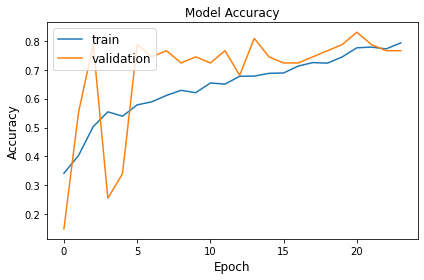

<Figure size 432x288 with 0 Axes>

In [2]:
## load history
with open('history_best_model.pkl', 'rb') as f:
    history = pickle.load(f)

    
## plot model accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model Accuracy', fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.legend(['train', 'validation'], loc='upper left', fontsize = 12)
plt.tight_layout()
plt.show()
plt.savefig('RESULTS/history_accuracy_plot.png')

## Plot training and validation loss

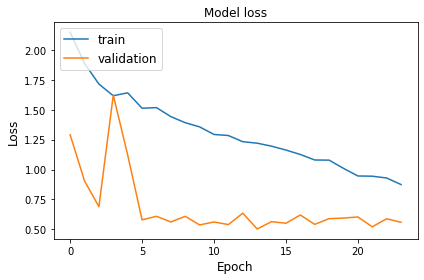

<Figure size 432x288 with 0 Axes>

In [3]:
## plot model loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss', fontsize = 12)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
plt.legend(['train', 'validation'], loc='upper left', fontsize = 12)
plt.tight_layout()
plt.show()

plt.savefig('RESULTS/history_loss_plot.png')

## Loading data and plotting frequencies of training and testing data 

In [8]:
## load data
x_train = np.load("created_data/MIAS_X_train_roi_multi.npy") / 255
y_train = np.load("created_data/MIAS_y_train_roi_multi.npy")
x_valid = np.load("created_data/MIAS_X_valid_roi_multi.npy") / 255
y_valid = np.load("created_data/MIAS_y_valid_roi_multi.npy") 
x_test = np.load("created_data/MIAS_X_test_roi_multi.npy") / 255
y_test = np.load("created_data/MIAS_y_test_roi_multi.npy") 

## print counts per class
print(np.unique(y_train, return_counts = True))
print(np.unique(y_valid, return_counts = True))
print(np.unique(y_test, return_counts = True))
print(len(y_train))
print(len(y_valid))
print(len(y_test))
## plot frequencies 
#plotfrequencies(y_train, per = True)
#plotfrequencies(y_test, per = True)
#plotfrequencies(y_train)
#plotfrequencies(y_test)

# One-hot encode labels
num_classes = 3
y_train = np_utils.to_categorical(y_train, num_classes)
y_valid = np_utils.to_categorical(y_valid, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

(array([0, 1, 2]), array([528, 528, 528], dtype=int64))
(array([0, 1, 2]), array([31,  9,  7], dtype=int64))
(array([0, 1, 2]), array([31,  9,  8], dtype=int64))
1584
47
48


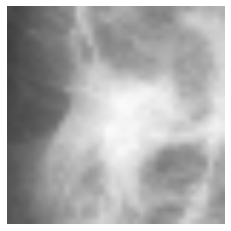

In [47]:
import cv2
import matplotlib.pyplot as plt

img = x_test[36]
desired_size = (564, 564)
resized_img = cv2.resize(img, desired_size, interpolation=cv2.INTER_LANCZOS4)

plt.imshow(resized_img)  # Plot the resized image
plt.axis('off')  # Turn off axes
plt.savefig("resized_image.jpg", dpi = 570)  # Save the resized image


## Loading model 

In [3]:
## load model 
model = keras.models.load_model('best_model.h5')

## Model summary

In [4]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 14)        2030      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 14)      

In [6]:
## save it to file
def myprint(s):
    with open('RESULTS/modelsummary.txt','a') as f:
        print(s, file=f)

model.summary(print_fn=myprint)

In [4]:
## get predictions on test set 
preds = model.predict(x_test)
y_pred_classes = np.argmax(preds, axis=1)
y_true = np.argmax(y_test, axis=1)

2/2 [==============================] - 2s 169ms/step


## Plot confusion matrix for test set

In [5]:
## generate confusion matrix 
cf = confusion_matrix(y_true, y_pred_classes)
print(cf)

[[29  1  1]
 [ 0  6  3]
 [ 1  4  3]]


In [15]:
def plot_confusion_matrix(y_true, y_pred_classes):
    # Compute confusion matrix
    # Define class labels
    class_names = ['Normal', 'Benign', 'Malignant']
    cm = confusion_matrix(y_true, y_pred_classes)

        # Create plot
        # Resize colorbar to match matrix height
    ax = plt.gca()

    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True, xticklabels=class_names, yticklabels=class_names,
               annot_kws={"fontsize":12}, ax = ax)
    plt.xlabel('Predicted classes', fontsize = 12)
    plt.ylabel('True classes', fontsize = 12)
    plt.title('Confusion matrix', fontsize = 12)
    plt.tight_layout()
    plt.savefig('RESULTS/confusion_matrix_model1.png')
    plt.show()

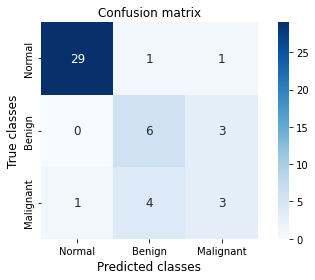

In [16]:
## visualize confusion matrix 

plot_confusion_matrix(y_true, y_pred_classes)

## Get evaluation report of model 

In [11]:
## evaluate model on test set 
report = evaluate_model(model, x_test, y_test)
print(report)

2/2 [==============================] - 1s 167ms/step
              precision    recall  f1-score   support

     Class 0       0.97      0.94      0.95        31
     Class 1       0.55      0.67      0.60         9
     Class 2       0.43      0.38      0.40         8

    accuracy                           0.79        48
   macro avg       0.65      0.66      0.65        48
weighted avg       0.80      0.79      0.79        48



## Overall statistics

In [17]:
conf_mat = cf
print(conf_mat)

# Calculate total number of predictions
total_predictions = np.sum(conf_mat)

# Calculate number of correct predictions
correct_predictions = np.sum(np.diag(conf_mat))

# Calculate overall accuracy
accuracy = correct_predictions / total_predictions
print("Overall Accuracy: {:.3f}".format(accuracy))

# Calculate balanced accuracy
class_counts = np.sum(conf_mat, axis=1) ## true instances per class (row marginal - sum over cols)
class_correct_predictions = np.diag(conf_mat) ## true positives (sum over diagoal)
class_accuracy = class_correct_predictions / class_counts.flatten() ## calculate accuracy per class = tp/tp + fn
balanced_accuracy = np.mean(class_accuracy) ## averaging over all class_accuracies = balanced accuracy
print("Balanced Accuracy: {:.3f}".format(balanced_accuracy))

# Compute metrics for each class
metrics_per_class = {} ## dict to store metrices
for i in range(len(conf_mat)):
    tp = conf_mat[i, i] # true positive
    fp = np.sum(conf_mat[:, i]) - tp # false positive (predicted class i but not class i)
    fn = np.sum(conf_mat[i, :]) - tp # false negatives (not predicted class i but class i)
    
    precision = tp / (tp + fp) ## precision of class i = tp / (tp + fp) -> correctly classified out of all predicted
    recall = tp / (tp + fn) ## recall of class i = tp / (tp + fn)  -> correctly classified out of all instances of class i
    f1_score = 2 * (precision * recall) / (precision + recall) ## f1-score = harmonic mean of precision and recall 
    ## store metrices per class
    metrics_per_class[f'Class {i}'] = {
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score
    }

## define dict to store macro averages
macro_metrics = {}

# loop over classes
for class_name, metrics in metrics_per_class.items():
    print(f"{class_name}:")
    for metric_name, metric_value in metrics.items(): ## loop over metrices 
        print(f"\t{metric_name}: {metric_value:.3f}") ## print metrics for each class
        macro_metrics[metric_name] = macro_metrics.get(metric_name, 0) + metric_value ## add class-wise metrics to total count

## loop over metrices and print macro average
for k, v in macro_metrics.items():
    macro_metrics[k] = v / len(conf_mat[0])
    print( f"Macro {k}, {round(macro_metrics[k],3)} ")
    
macro_metrics["Overall Accuracy"] = accuracy
macro_metrics["Balanced Accuracy"] = balanced_accuracy



[[29  1  1]
 [ 0  6  3]
 [ 1  4  3]]
Overall Accuracy: 0.792
Balanced Accuracy: 0.659
Class 0:
	Precision: 0.967
	Recall: 0.935
	F1-score: 0.951
Class 1:
	Precision: 0.545
	Recall: 0.667
	F1-score: 0.600
Class 2:
	Precision: 0.429
	Recall: 0.375
	F1-score: 0.400
Macro Precision, 0.647 
Macro Recall, 0.659 
Macro F1-score, 0.65 


In [18]:
df_per_class_avg = round(pd.DataFrame(metrics_per_class),2)
df_per_class_avg

with open('RESULTS/class_results_firstmod.tex','w') as tf:
    tf.write(df_per_class_avg.to_latex())

In [21]:
df_per_class_avg

,Class 0,Class 1,Class 2
Precision,0.97,0.55,0.43
Recall,0.94,0.67,0.38
F1-score,0.95,0.60,0.40


In [19]:
# Create an empty DataFrame with two columns and three rows
df_macro_avg = round(pd.DataFrame.from_dict(macro_metrics, orient='index', columns=['CNN Model (averaged over 10 runs)'])
,2).transpose()
df_macro_avg
## combining dataframes
df3 = pd.concat([df_baseline, df_macro_avg])
df3.index = ['Baseline Model', 'CNN model']
df3

with open('RESULTS/results_firstmod.tex','w') as tf:
    tf.write(df3.to_latex())

In [20]:
df3

,Precision,Recall,F1-score,Overall Accuracy,Balanced Accuracy
Baseline Model,NaN,0.33,NaN,0.65,0.33
CNN model,0.65,0.66,0.65,0.79,0.66


## Baseline classifier

In [5]:
## baseline confusion matrix
print(np.unique(y_test, return_counts = True))

## baseline classifier predicts only majority class which is "normal" = 0
baseline_cm = np.array([(31, 0, 0),
                         (9, 0, 0),
                         (8, 0, 0)])
conf_mat = baseline_cm


# Calculate total number of predictions
total_predictions = np.sum(conf_mat)

# Calculate number of correct predictions
correct_predictions = np.sum(np.diag(conf_mat))

# Calculate overall accuracy
accuracy = correct_predictions / total_predictions
print("Overall Accuracy: {:.3f}".format(accuracy))

# Calculate balanced accuracy
class_counts = np.sum(conf_mat, axis=1) ## true instances per class (row marginal - sum over cols)
class_correct_predictions = np.diag(conf_mat) ## true positives (sum over diagoal)
class_accuracy = class_correct_predictions / class_counts.flatten() ## calculate accuracy per class = tp/tp + fn
balanced_accuracy = np.mean(class_accuracy) ## averaging over all class_accuracies = balanced accuracy
print("Balanced Accuracy: {:.3f}".format(balanced_accuracy))

# Compute metrics for each class
metrics_per_class = {} ## dict to store metrices
for i in range(len(conf_mat)):
    tp = conf_mat[i, i] # true positive
    fp = np.sum(conf_mat[:, i]) - tp # false positive (predicted class i but not class i)
    fn = np.sum(conf_mat[i, :]) - tp # false negatives (not predicted class i but class i)
    
    precision = tp / (tp + fp) ## precision of class i = tp / (tp + fp) -> correctly classified out of all predicted
    recall = tp / (tp + fn) ## recall of class i = tp / (tp + fn)  -> correctly classified out of all instances of class i
    f1_score = 2 * (precision * recall) / (precision + recall) ## f1-score = harmonic mean of precision and recall 
    ## store metrices per class
    metrics_per_class[f'Class {i}'] = {
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score
    }

## define dict to store macro averages
macro_metrics = {}

# loop over classes
for class_name, metrics in metrics_per_class.items():
    print(f"{class_name}:")
    for metric_name, metric_value in metrics.items(): ## loop over metrices 
        print(f"\t Baseline {metric_name}: {metric_value:.3f}") ## print metrics for each class
        macro_metrics[metric_name] = macro_metrics.get(metric_name, 0) + metric_value ## add class-wise metrics to total count

## loop over metrices and print macro average
for k, v in macro_metrics.items():
    macro_metrics[k] = v / len(conf_mat[0])
    print( f"Baseline Macro {k}, {round(macro_metrics[k],3)} ")
    
        
macro_metrics["Overall Accuracy"] = accuracy
macro_metrics["Balanced Accuracy"] = balanced_accuracy

(array([0., 1.], dtype=float32), array([96, 48], dtype=int64))
Overall Accuracy: 0.646
Balanced Accuracy: 0.333
Class 0:
	 Baseline Precision: 0.646
	 Baseline Recall: 1.000
	 Baseline F1-score: 0.785
Class 1:
	 Baseline Precision: nan
	 Baseline Recall: 0.000
	 Baseline F1-score: nan
Class 2:
	 Baseline Precision: nan
	 Baseline Recall: 0.000
	 Baseline F1-score: nan
Baseline Macro Precision, nan 
Baseline Macro Recall, 0.333 
Baseline Macro F1-score, nan 


C:\Users\user\AppData\Local\Temp/ipykernel_12588/1219750040.py:35: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp) ## precision of class i = tp / (tp + fp) -> correctly classified out of all predicted


In [6]:
print(macro_metrics)

{'Precision': nan, 'Recall': 0.3333333333333333, 'F1-score': nan, 'Overall Accuracy': 0.6458333333333334, 'Balanced Accuracy': 0.3333333333333333}


In [7]:
# Create an empty DataFrame with two columns and three rows
df_baseline = round(pd.DataFrame.from_dict(macro_metrics, orient='index', columns=['Baseline Model (majority predictor)'])
,2).transpose()
df_baseline


,Precision,Recall,F1-score,Overall Accuracy,Balanced Accuracy
Baseline Model (majority predictor),NaN,0.33,NaN,0.65,0.33


## Plot AUC curve on test set 

In [15]:
def plot_roc_curve(model, x_test, y_test):
    """
    Plots the ROC curve for a multi-class classification model.
    """
    y_pred = model.predict(x_test)
    n_classes = y_test.shape[1]
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 12)
    plt.ylabel('True Positive Rate', fontsize = 12)
    plt.title('ROC Curve', fontsize = 12)
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig('RESULTS/roc_curve_model1.png')
    plt.show()

2/2 [==============================] - 1s 169ms/step


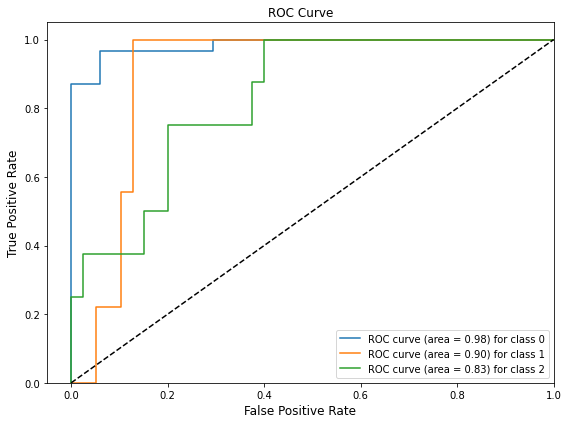

In [16]:
plot_roc_curve(model, x_test, y_test)

## Get averaged confusion matrix over 10 runs

[[28.   1.2  1.8]
 [ 0.   5.4  3.6]
 [ 1.2  3.   3.8]]


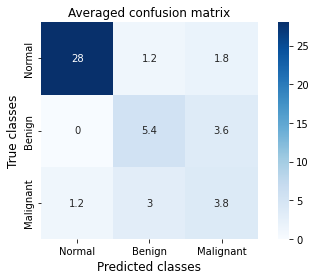

In [17]:
# Load the matrix from the file
avg_cm = np.load('avg_cm.npy')
print(avg_cm)

## define class names
class_names = ['Normal', 'Benign', 'Malignant']

# Plot confusion matrix
ax = plt.gca()

sns.heatmap(avg_cm, annot=True, fmt='g', cmap='Blues', square = True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted classes', fontsize = 12)
plt.ylabel('True classes', fontsize = 12)
plt.title('Averaged confusion matrix', fontsize = 12)
plt.tight_layout()
plt.savefig('RESULTS/confusion_matrix_avg.png')
plt.show()



## Get averaged evaluation metrics over 10 runs

In [10]:
# Calculate total number of predictions
conf_mat = avg_cm
total_predictions = np.sum(conf_mat)

# Calculate number of correct predictions
correct_predictions = np.sum(np.diag(conf_mat))

# Calculate overall accuracy
accuracy = correct_predictions / total_predictions
print("Overall Accuracy: {:.3f}".format(accuracy))

# Calculate balanced accuracy
class_counts = np.sum(conf_mat, axis=1) ## true instances per class (row marginal - sum over cols)
class_correct_predictions = np.diag(conf_mat) ## true positives (sum over diagoal)
class_accuracy = class_correct_predictions / class_counts.flatten() ## calculate accuracy per class = tp/tp + fn
balanced_accuracy = np.mean(class_accuracy) ## averaging over all class_accuracies = balanced accuracy
print("Balanced Accuracy: {:.3f}".format(balanced_accuracy))

# Compute metrics for each class
metrics_per_class = {} ## dict to store metrices
for i in range(len(conf_mat)):
    tp = conf_mat[i, i] # true positive
    fp = np.sum(conf_mat[:, i]) - tp # false positive (predicted class i but not class i)
    fn = np.sum(conf_mat[i, :]) - tp # false negatives (not predicted class i but class i)
    
    precision = tp / (tp + fp) ## precision of class i = tp / (tp + fp) -> correctly classified out of all predicted
    recall = tp / (tp + fn) ## recall of class i = tp / (tp + fn)  -> correctly classified out of all instances of class i
    f1_score = 2 * (precision * recall) / (precision + recall) ## f1-score = harmonic mean of precision and recall 
    ## store metrices per class
    metrics_per_class[f'Class {i}'] = {
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score
    }

## define dict to store macro averages
macro_metrics = {}

# loop over classes
for class_name, metrics in metrics_per_class.items():
    print(f"{class_name}:")
    for metric_name, metric_value in metrics.items(): ## loop over metrices 
        print(f"\t{metric_name}: {metric_value:.3f}") ## print metrics for each class
        macro_metrics[metric_name] = macro_metrics.get(metric_name, 0) + metric_value ## add class-wise metrics to total count

## loop over metrices and print macro average
for k, v in macro_metrics.items():
    macro_metrics[k] = v / len(conf_mat[0])
    print( f"Macro {k}, {round(macro_metrics[k],3)} ")
    
macro_metrics["Overall Accuracy"] = accuracy
macro_metrics["Balanced Accuracy"] = balanced_accuracy


Overall Accuracy: 0.775
Balanced Accuracy: 0.659
Class 0:
	Precision: 0.959
	Recall: 0.903
	F1-score: 0.930
Class 1:
	Precision: 0.562
	Recall: 0.600
	F1-score: 0.581
Class 2:
	Precision: 0.413
	Recall: 0.475
	F1-score: 0.442
Macro Precision, 0.645 
Macro Recall, 0.659 
Macro F1-score, 0.651 


In [ ]:
print(metrics_per_class)

In [67]:
df_per_class_avg = round(pd.DataFrame(metrics_per_class),2)
df_per_class_avg

,Class 0,Class 1,Class 2
Precision,0.96,0.56,0.41
Recall,0.90,0.60,0.48
F1-score,0.93,0.58,0.44


In [74]:
with open('RESULTS/class_results.tex','w') as tf:
    tf.write(df_per_class_avg.to_latex())

In [60]:
print(macro_metrics)

{'Precision': 0.6448158626166369, 'Recall': 0.6594086021505378, 'F1-score': 0.6509127281820456, 'Overall Accuracy': 0.7749999999999999, 'Balanced Accuracy': 0.6594086021505378}


In [11]:
# Create an empty DataFrame with two columns and three rows
df_macro_avg = round(pd.DataFrame.from_dict(macro_metrics, orient='index', columns=['CNN Model (averaged over 10 runs)'])
,2).transpose()
df_macro_avg

,Precision,Recall,F1-score,Overall Accuracy,Balanced Accuracy
CNN Model (averaged over 10 runs),0.64,0.66,0.65,0.77,0.66


In [12]:
## combining dataframes
df3 = pd.concat([df_baseline, df_macro_avg])
df3.index = ['Baseline Model', 'CNN model']
df3

,Precision,Recall,F1-score,Overall Accuracy,Balanced Accuracy
Baseline Model,NaN,0.33,NaN,0.65,0.33
CNN model,0.64,0.66,0.65,0.77,0.66


In [13]:
with open('RESULTS/avg_results.tex','w') as tf:
    tf.write(df3.to_latex())